# Convolutional Neural Network Architecture

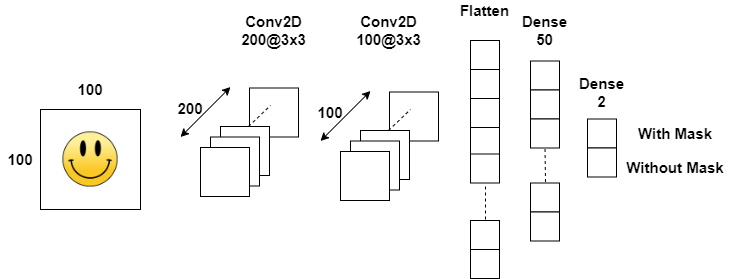

In [1]:
import numpy as np

data=np.load('data.npy')
target=np.load('target.npy')

#loading the save numpy arrays in the previous code

In [2]:
from keras.models import Sequential
from keras.layers import Dense, Activation, Flatten, Dropout, Conv2D, MaxPooling2D, Input
from keras.callbacks import ModelCheckpoint

model = Sequential()

# Add Input layer
model.add(Input(shape=data.shape[1:]))

# First CNN layer
model.add(Conv2D(200, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

# Second CNN layer
model.add(Conv2D(100, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

# Fully connected layers
model.add(Flatten())
model.add(Dropout(0.5))
model.add(Dense(50, activation='relu'))
model.add(Dense(2, activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [3]:
from sklearn.model_selection import train_test_split

train_data,test_data,train_target,test_target=train_test_split(data,target,test_size=0.1)

In [4]:
checkpoint = ModelCheckpoint('model-{epoch:03d}.keras', monitor='val_loss', verbose=0, save_best_only=True, mode='auto')
history= model.fit(train_data, train_target, epochs=20, callbacks=[checkpoint], validation_split=0.2)

Epoch 1/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 32s 871ms/step - accuracy: 0.5386 - loss: 0.7272 - val_accuracy: 0.7160 - val_loss: 0.6340
Epoch 2/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 26s 822ms/step - accuracy: 0.6321 - loss: 0.6137 - val_accuracy: 0.8240 - val_loss: 0.5055
Epoch 3/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 25s 773ms/step - accuracy: 0.8015 - loss: 0.4604 - val_accuracy: 0.8480 - val_loss: 0.3615
Epoch 4/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 25s 790ms/step - accuracy: 0.8794 - loss: 0.3033 - val_accuracy: 0.9160 - val_loss: 0.2417
Epoch 5/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 27s 826ms/step - accuracy: 0.9200 - loss: 0.2146 - val_accuracy: 0.9120 - val_loss: 0.2242
Epoch 6/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 27s 832ms/step - accuracy: 0.9373 - loss: 0.1617 - val_accuracy: 0.9200 - val_loss: 0.1940
Epoch 7/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 27s 837ms/step - accuracy: 0.9404 - loss: 0.1538 - val_accuracy: 0.9200 - val_loss: 0.2255
Epoch 8/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 27s 837ms/step - accuracy: 0.9470 - loss: 0.1280 - val_accu

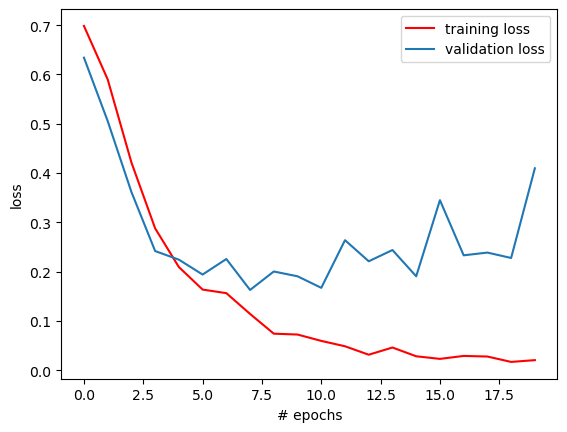

In [5]:
from matplotlib import pyplot as plt

plt.plot(history.history['loss'],'r',label='training loss')
plt.plot(history.history['val_loss'],label='validation loss')
plt.xlabel('# epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

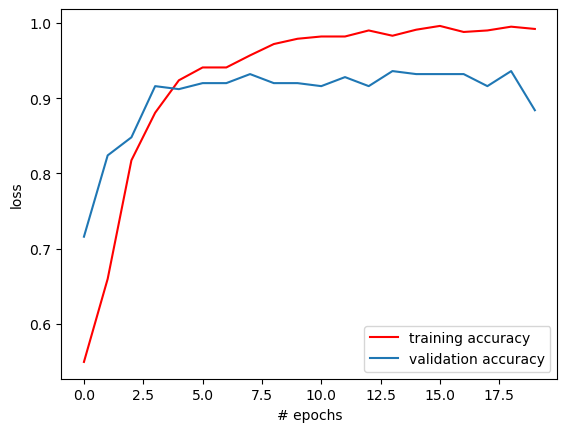

In [6]:
plt.plot(history.history['accuracy'],'r',label='training accuracy')
plt.plot(history.history['val_accuracy'],label='validation accuracy')
plt.xlabel('# epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

In [7]:
print(model.evaluate(test_data,test_target))

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step - accuracy: 0.8996 - loss: 0.3575 
[0.4356931746006012, 0.8848921060562134]
